In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 50)

In [3]:
battles = pd.read_csv('battles.csv')
char_deaths = pd.read_csv('character-deaths.csv')
char_pred = pd.read_csv('character-predictions.csv')

In [4]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [5]:
battles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   attacker_1          38 non-null     object 
 6   attacker_2          10 non-null     object 
 7   attacker_3          3 non-null      object 
 8   attacker_4          2 non-null      object 
 9   defender_1          37 non-null     object 
 10  defender_2          2 non-null      object 
 11  defender_3          0 non-null      float64
 12  defender_4          0 non-null      float64
 13  attacker_outcome    37 non-null     object 
 14  battle_type         37 non-null     object 
 15  major_death         37 non-null     float64
 16  major_capt

In [6]:
col_to_drop = ['attacker_2', 'attacker_3', 'attacker_4', 'defender_2', 'defender_3', 'defender_4', 'note']


In [7]:
sub_bat = battles.drop(columns=col_to_drop)

,name,year,battle_number,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Baratheon,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Tully,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Lannister,win,ambush,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Darry,win,pitched battle,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,Stark,win,pitched battle,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,Stark,win,siege,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,Stark,win,ambush,0.0,0.0,264.0,NaN,Theon Greyjoy,NaN,1.0,Stony Shore,The North


In [32]:
print(battles.attacker_king.unique())
print(battles.defender_king.unique())
print(battles.attacker_1.unique())
print(battles.defender_1.unique())

['Joffrey/Tommen Baratheon' 'Robb Stark' 'Balon/Euron Greyjoy'
 'Stannis Baratheon' nan]
['Robb Stark' 'Joffrey/Tommen Baratheon' 'Balon/Euron Greyjoy'
 'Renly Baratheon' nan 'Mance Rayder' 'Stannis Baratheon']
['Lannister' 'Stark' 'Greyjoy' 'Bolton' 'Baratheon' 'Darry'
 'Brotherhood without Banners' 'Frey' 'Free folk' 'Brave Companions'
 'Bracken']
['Tully' 'Baratheon' 'Lannister' 'Darry' 'Stark' 'Greyjoy'
 'Brave Companions' 'Mallister' "Night's Watch" nan 'Tyrell' 'Blackwood'
 'Bolton']


In [ ]:
battles[battles['']]

In [4]:
char_deaths

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,None,NaN,NaN,NaN,21.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0


In [27]:
char_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


In [36]:
len(set(char_pred['name']) - set(char_deaths['Name']))

1097

In [37]:
char_deaths['Allegiances'].unique()

array(['Lannister', 'None', 'House Targaryen', 'House Greyjoy',
       'Baratheon', "Night's Watch", 'Arryn', 'House Stark',
       'House Tyrell', 'Tyrell', 'Stark', 'Greyjoy', 'House Lannister',
       'Martell', 'House Martell', 'Wildling', 'Targaryen', 'House Arryn',
       'House Tully', 'Tully', 'House Baratheon'], dtype=object)

<AxesSubplot:ylabel='Allegiances'>

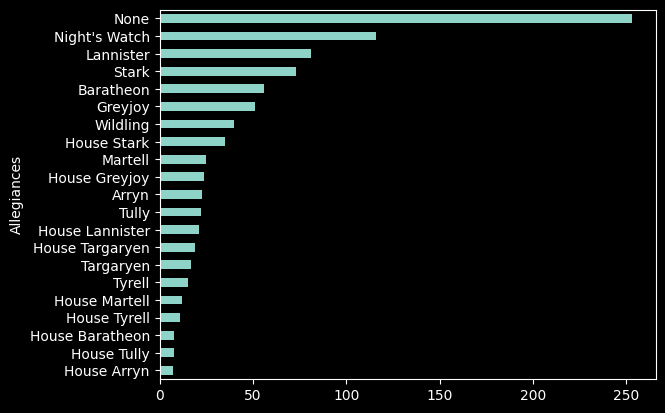

In [24]:
death_by_allegiance = char_deaths.groupby('Allegiances')['Name'].count().sort_values()
death_by_allegiance.plot(kind='barh')

In [20]:
char_deaths[char_deaths['Name'] == 'Addam Marbrand'] 

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0


In [18]:
char_deaths[char_deaths['Name'] == 'Viserys II Targaryen'] 

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD


In [19]:
char_deaths[char_deaths['Name'] == 'Walder Frey'] 

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
862,Walder Frey,None,NaN,NaN,NaN,28.0,1,1,1,0,1,0,0


In [5]:
char_pred

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,0,1,0.803,0.197,Luwin,NaN,1,Westeros,NaN,299.0,NaN,NaN,NaN,House Stark,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,1,0.351171,0
1942,1943,0,1,0.987,0.013,Reek,NaN,1,NaN,NaN,299.0,NaN,NaN,NaN,House Bolton,NaN,0,1,0,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.096990,0
1943,1944,1,1,0.520,0.480,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.030100,1
1944,1945,1,1,0.637,0.363,Coldhands,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,Three-eyed crow,NaN,0,0,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.130435,1


In [49]:
# Filtering Characters that swore allegiance 
char_pred[char_pred['name'].isin(list(char_deaths['Name']))]

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0,0,0.043478,1
8,9,0,1,0.724,0.276,Wilbert,Ser,1,NaN,NaN,298.0,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.006689,0
10,11,0,0,0.167,0.833,Will,NaN,1,NaN,NaN,297.0,NaN,NaN,NaN,Night's Watch,NaN,1,1,0,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.163880,0
11,12,1,1,0.985,0.015,Will (orphan),NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.003344,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,1938,0,0,0.155,0.845,Symon Silver Tongue,NaN,1,NaN,NaN,299.0,NaN,NaN,NaN,NaN,NaN,0,1,1,0,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.046823,0
1938,1939,1,0,0.201,0.799,Moqorro,Slave of R'hllor,1,NaN,NaN,NaN,NaN,NaN,NaN,R'hllor,NaN,0,0,0,0,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.123746,1
1941,1942,0,1,0.803,0.197,Luwin,NaN,1,Westeros,NaN,299.0,NaN,NaN,NaN,House Stark,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,1,0.351171,0
1942,1943,0,1,0.987,0.013,Reek,NaN,1,NaN,NaN,299.0,NaN,NaN,NaN,House Bolton,NaN,0,1,0,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.096990,0


In [44]:
print(len(char_pred[~(char_pred['father'].isna())]))

26


In [43]:
char_pred[~(char_pred['father'].isna())]

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
5,6,1,0,0.021,0.979,Tommen Baratheon,NaN,1,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1,1,1.000000,1
7,8,0,0,0.036,0.964,Viserys I Targaryen,NaN,1,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1,1,0.678930,0
50,51,0,0,0.397,0.603,Joffrey Baratheon,NaN,1,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Tommen Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1,1,1.000000,0
53,54,0,0,0.069,0.931,Maegor I Targaryen,NaN,1,NaN,NaN,NaN,Visenya Targaryen,Aegon I Targaryen,Jaehaerys Targaryen,NaN,NaN,0,0,0,0,0,0.0,0.0,1.0,NaN,0,0,NaN,0,0,1,0.705686,0
101,102,0,0,0.036,0.964,Robb Stark,NaN,1,NaN,NaN,NaN,Catelyn Stark,Eddard Stark,Bran Stark,NaN,NaN,0,0,0,0,0,0.0,0.0,1.0,NaN,0,0,NaN,7,1,1,1.000000,0
172,173,1,0,0.036,0.964,Stannis Baratheon,NaN,1,NaN,NaN,NaN,Cassana Estermont,Steffon Baratheon,Shireen Baratheon,NaN,NaN,0,0,0,0,0,0.0,0.0,1.0,NaN,0,0,NaN,4,1,1,1.000000,1
211,212,1,1,0.661,0.339,Tristifer V Mudd,NaN,1,NaN,NaN,NaN,NaN,Tristifer IV Mudd,NaN,NaN,NaN,0,0,0,0,0,NaN,0.0,NaN,NaN,0,0,NaN,0,0,0,0.016722,1
280,281,0,0,0.110,0.890,Aegon I Targaryen,NaN,1,NaN,NaN,NaN,Valaena Velaryon,Aerion Targaryen,Aenys Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,1.0,NaN,0,0,NaN,6,1,1,1.000000,0
281,282,0,0,0.031,0.969,Aegon II Targaryen,NaN,1,NaN,NaN,NaN,Alicent Hightower,Viserys I Targaryen,Jaehaerys Targaryen,NaN,NaN,0,0,0,0,0,0.0,0.0,1.0,NaN,0,0,NaN,7,1,1,0.759197,0


In [45]:
battles['region'].unique()

array(['The Westerlands', 'The Riverlands', 'The North', 'The Stormlands',
       'The Crownlands', 'Beyond the Wall', 'The Reach'], dtype=object)

In [46]:
char_pred['culture'].unique()

array([nan, 'Rivermen', 'Dornish', 'Valyrian', 'Ironborn', 'Free Folk',
       'Northmen', 'Summer Isles', 'Braavosi', 'Dothraki', 'Ghiscari',
       'Vale mountain clans', 'Reach', 'Tyroshi', 'Lhazarene',
       'Free folk', 'Ironmen', 'Qartheen', 'Lysene', 'westermen',
       'Westerman', 'Qarth', 'Lyseni', 'northmen', 'Qohor', 'Westeros',
       'Norvoshi', 'First Men', 'Meereenese', 'Andal', 'Astapori',
       'Westermen', 'ironborn', 'Ghiscaricari', 'Braavos', 'Stormlands',
       'Valemen', 'Myrish', 'Lhazareen', 'Dornishmen', 'Sistermen',
       'Northern mountain clans', 'Andals', 'Vale', 'Crannogmen',
       'Wildling', 'Dorne', 'Pentoshi', 'free folk', 'Summer Islander',
       'Westerlands', 'Summer Islands', 'Asshai', 'Riverlands', 'Naathi',
       'Rhoynar', 'Meereen', 'Norvos', 'Stormlander', 'Wildlings',
       'Astapor', 'Reachmen', "Asshai'i", 'Ibbenese', 'The Reach'],
      dtype=object)

In [39]:
print(battles.attacker_king.unique())
print(battles.defender_king.unique())

['Joffrey/Tommen Baratheon' 'Robb Stark' 'Balon/Euron Greyjoy'
 'Stannis Baratheon' nan]
['Robb Stark' 'Joffrey/Tommen Baratheon' 'Balon/Euron Greyjoy'
 'Renly Baratheon' nan 'Mance Rayder' 'Stannis Baratheon']


In [40]:
char_pred['father'].value_counts()

Daemon Targaryen          2
Aegon I Targaryen         2
Aenys I Targaryen         2
Quellon Greyjoy           2
Aegon III Targaryen       2
Robert Baratheon          2
Brandon Stark             1
Halleck Hoare             1
Aegon V Targaryen         1
Qhorwyn Hoare             1
Aegon IV Targaryen        1
Jaehaerys II Targaryen    1
Daeron II Targaryen       1
Viserys I Targaryen       1
Aerion Targaryen          1
Tristifer IV Mudd         1
Steffon Baratheon         1
Eddard Stark              1
Baelon Targaryen          1
Maekar I Targaryen        1
Name: father, dtype: int64

In [28]:
char_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse             276 non-null    object 
 16  book1              1946 

In [31]:
num = char_pred.select_dtypes(['int', 'float'])
num.corr()['isAlive']

S.No                -0.128712
actual               0.997291
pred                 0.356483
alive                0.417318
plod                -0.417318
male                -0.146982
dateOfBirth         -0.085863
DateoFdeath               NaN
book1               -0.147401
book2               -0.067200
book3                0.006693
book4                0.268975
book5                0.032846
isAliveMother       -0.043033
isAliveFather        0.195992
isAliveHeir          0.384900
isAliveSpouse        0.174275
isMarried           -0.050037
isNoble             -0.042211
age                  0.087264
numDeadRelations    -0.192444
boolDeadRelations   -0.193736
isPopular           -0.153860
popularity          -0.183223
isAlive              1.000000
Name: isAlive, dtype: float64

In [17]:
char_pred[char_pred['name'] == 'Aegon Targaryen']

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive


In [16]:
char_pred[char_pred['name'].isin(['Addam Marbrand', 'Aegon Frey (Jinglebell)', 'Aegon Targaryen'])]

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
1457,1458,1,0,0.46,0.54,Addam Marbrand,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Marbrand,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.130435,1


In [8]:
char_pred['actual'].equals(char_pred['isAlive'])

False

In [9]:
char_pred.title.nunique()

262